In [14]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

Flagged bonds trianle =  [(62, 77), (76, 91), (90, 105), (104, 119)]
Flagged bonds pentagon =  []


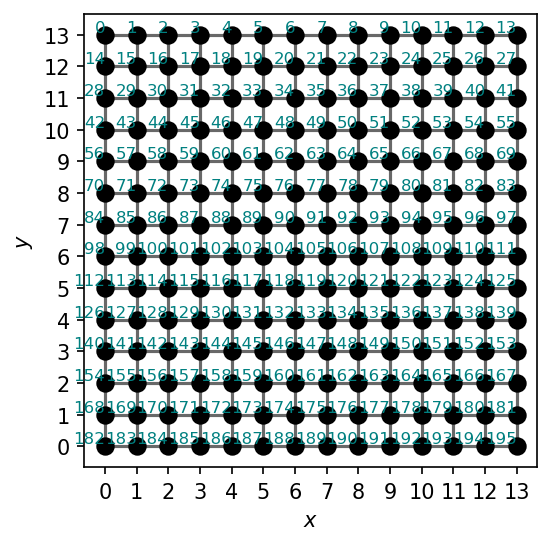

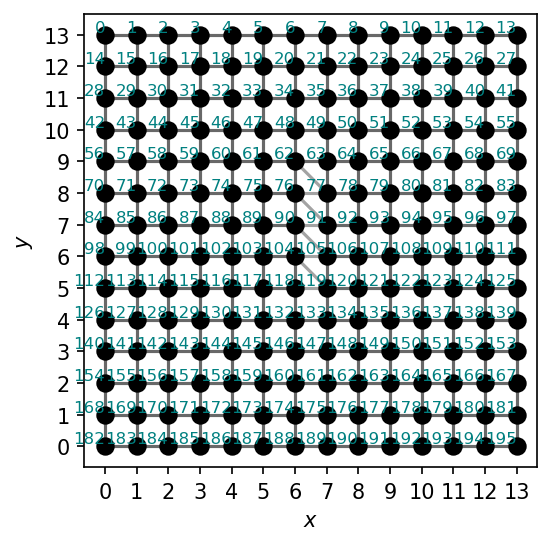

In [15]:
mu = 2.0
delta = complex(1.0, 0.0)
t = 1.0

N = 14
lattice = SquareLattice(N, BC="periodic")
lattice.plot(True)
dist = 4

start_idx = (N // 2 - dist // 2) * N + N // 2
end_idx = (N // 2 + dist // 2) * N + N // 2
lattice.add_bonds(
    [(i - N - 1, i) for i in range(start_idx, end_idx, N)],
    [(1, 3) for i in range(start_idx, end_idx, N)],
)
lattice.remove_bonds([(i - 1, i) for i in range(start_idx, end_idx, N)])
num_sites = lattice.get_num_sites()
lattice_sites = lattice.get_sites()
lattice.plot(True)


n = -1
hop_phase_triangle = np.exp(n * complex(0, 1) * np.pi / 2)
flagged_bonds_triangle = [(i - N - 1, i) for i in range(start_idx, end_idx, N)]
flagged_bonds_pentagon = []

print("Flagged bonds trianle = ", flagged_bonds_triangle)
print("Flagged bonds pentagon = ", flagged_bonds_pentagon)

Lowest found energy:  0.15019664561491325
Index of lowest absolute energy:  391


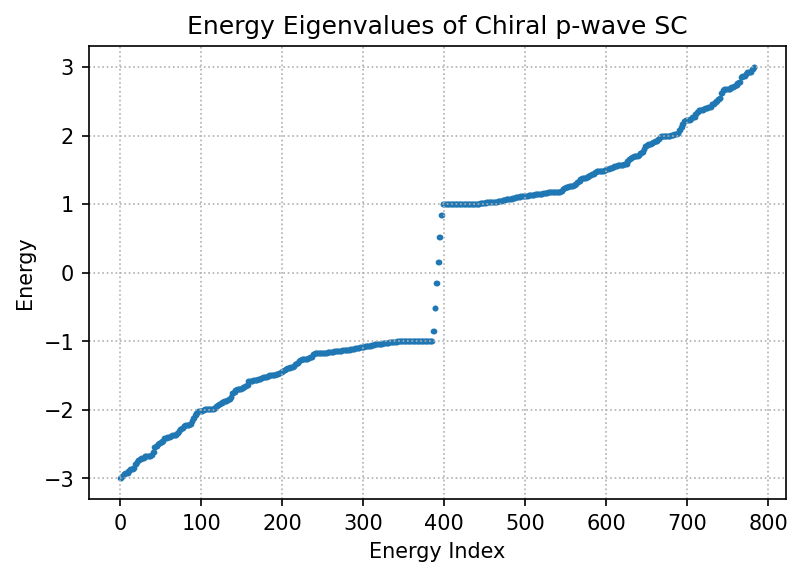

Index = 391 with energy E = -0.15019664561491325


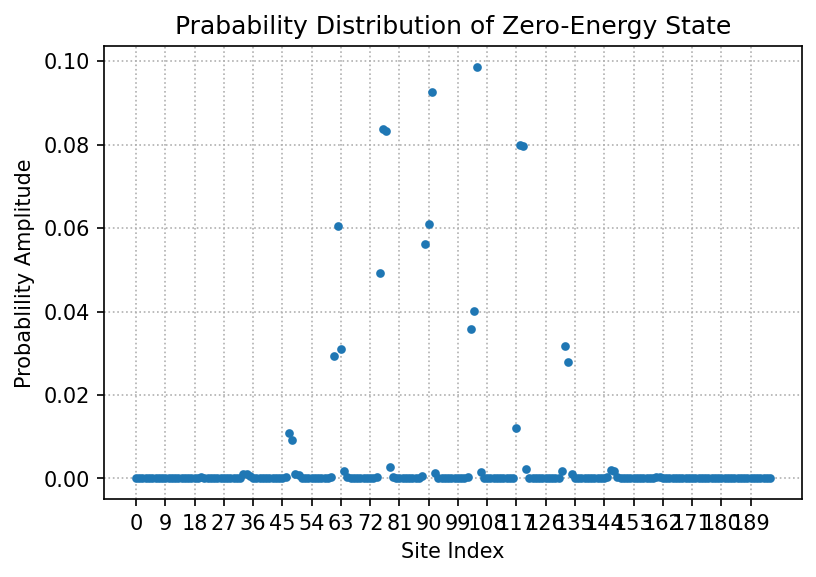

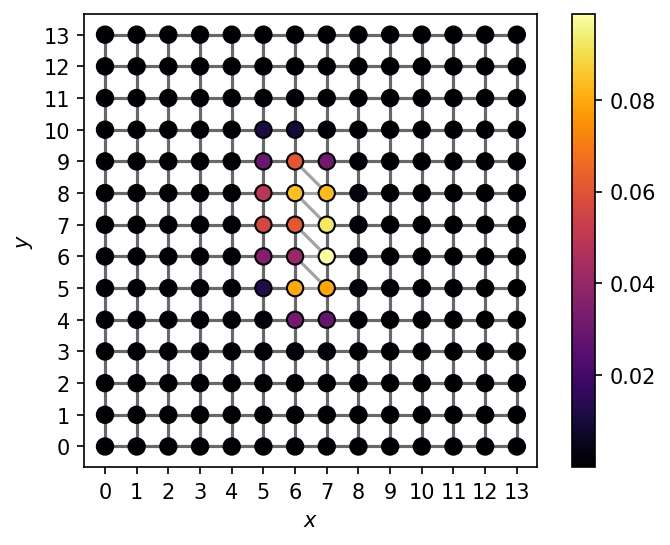

In [16]:
Ham_constructor = HamiltonianConstructor(mu, t, t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())

for flagged_bond in flagged_bonds_triangle:
    Ham_constructor.add_phase(
        H_direct_lattice, flagged_bond, hop_phase_triangle, num_sites
    )

hop_phase_pentagon = hop_phase_triangle.conjugate()
for flagged_bond in flagged_bonds_pentagon:
    Ham_constructor.add_phase(
        H_direct_lattice, flagged_bond, hop_phase_pentagon, num_sites
    )

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)
plt.show()

for gs_idx in range(gs_idx, gs_idx + 1):
    print(f"Index = {gs_idx} with energy E = {energies[gs_idx]}")
    gs_wave_function = states[:, gs_idx]
    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    plt.xlabel("Site Index")
    plt.xticks(range(0, num_sites, num_sites // min(num_sites, 20)))
    plt.ylabel("Probablility Amplitude")
    plt.title("Prabability Distribution of Zero-Energy State")
    plt.grid(linestyle=":", zorder=-10)
    plt.scatter(range(num_sites), gs_probabilities, s=10, zorder=10)

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("inferno")
    sc = lattice.plot(False, c=(gs_probabilities), cmap=color_map)
    plt.colorbar(sc)
    plt.show()